# <center> Data Analysis on Salaries </center> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'Data/ds_salaries.csv')

## Preprocessing

In [6]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.shape

(3755, 11)

In [13]:
df.duplicated().sum()

np.int64(1171)

In [21]:
duplicates=pd.DataFrame(df.value_counts())
duplicates[duplicates['count']>1]

count
work_year experience_level employment_type job_title          salary  salary_currency salary_in_usd employee_residence remote_ratio company_location company_size       
2022      SE               FT              Data Scientist     141525  USD             141525        US                 100          US               M                21
                                                              191475  USD             191475        US                 100          US               M                21
2023      SE               FT              Data Engineer      252000  USD             252000        US                 0            US               M                13
                                                              129000  USD             129000        US                 0            US               M                13
2022      SE               FT              Data Engineer      130000  USD             130000        US                 0            US               M                12
...                                                                                                                                                                  ...
                                           Data Scientist     92000   USD             92000         US                 100          US               L                 2
2023      EX               FT              Data Engineer      235000  USD             235000        US                 0            US               M                 2
          EN               FT              Research Engineer  155000  USD             155000        US                 0            US               M                 2
          SE               FT              Research Scientist 253750  USD             253750        ES                 0            ES               M                 2
2020      EN               FT              Data Engineer      1000000 INR             13493         IN                 100          IN               L                 2

[544 rows x 1 columns]

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(2584, 11)

## Exploratory Data Analytics (EDA)

In [38]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_numeric
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2


**1. Which country offers the highest salaries?**

In [10]:
# Group by 'employee_residence' and calculate the mean salary in USD for each country
salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean()

highest_salary_country = salary_by_country.idxmax()
highest_salary_value = salary_by_country.max()

print(f'The country with the hightest salaries is {highest_salary_country} with an average of ${highest_salary_value} (USD).')


The country with the hightest salaries is IL with an average of $423834.0 (USD).


Upon noticing that the average salary in Israel (IL) was extremely high, I decided to investigate the reasons behind this figure. To do so, I examined the available data regarding the number of employees at each experience level present in the dataset. 

**(EXTRA) Number of Employees of each experience level recorded in the dataset as working in Israel (IL):**

In [50]:
# Filter the DataFrame for employees in country 'IL'
il_employees = df[df['company_location'] == 'IL']

# Count the occurrences of each experience level in Israel
il_experience_count = il_employees['experience_level'].value_counts()

print("Number of employees in IL by experience level:")
print(il_experience_count)

Number of employees in IL by experience level:
experience_level
SE    1
MI    1
Name: count, dtype: int64


### Observations:

The average salary in Israel appears exceptionally high primarily due to the limited number of employees in the dataset for each experience level. With only 1 Senior (SE) and 1 Mid-level (MI) employee recorded, their potentially high salaries disproportionately elevate the average. This suggests that the dataset may not represent a comprehensive view of the workforce in Israel, leading to skewed average salary figures. Consequently, the high average may not accurately reflect the broader job market or the actual salary trends for different experience levels in the country.

**2. Which country has higher salary per job title?**

In [52]:
# Group by 'job_title' and 'company_location' and calculate the mean salary in USD
salary_by_job_country = df.groupby(['job_title', 'company_location'])['salary_in_usd'].mean()

# Convert the Series to a DataFrame for easier manipulation
salary_by_job_country_df = salary_by_job_country.reset_index()

# Find the country with the highest salary for each job title
highest_salary_per_job = salary_by_job_country_df.loc[salary_by_job_country_df.groupby('job_title')['salary_in_usd'].idxmax()]

print(highest_salary_per_job)

                         job_title company_location  salary_in_usd
2    3D Computer Vision Researcher               CR   50000.000000
8                     AI Developer               IN  300000.000000
13                   AI Programmer               AU   55000.000000
20                    AI Scientist               IL  423834.000000
25              Analytics Engineer               US  157501.000000
..                             ...              ...            ...
339              Research Engineer               US  172327.925926
345             Research Scientist               ES  211475.000000
353         Software Data Engineer               SG   75020.000000
354             Staff Data Analyst               CA   15000.000000
355           Staff Data Scientist               US  105000.000000

[93 rows x 3 columns]


**3. Top 3 job titles with the highest salaries:** 

In [51]:
# Group by job title and calculate the mean salary in USD for each job title
average_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the results in descending order
top_job_titles = average_salary_by_title.sort_values(ascending=False).head(3)

print("Top 3 job titles with the highest salaries:")
print(top_job_titles)

Top 3 job titles with the highest salaries:
job_title
Data Science Tech Lead    375000.0
Cloud Data Architect      250000.0
Data Lead                 212500.0
Name: salary_in_usd, dtype: float64


**4. What is the average salary for each level of experience?**

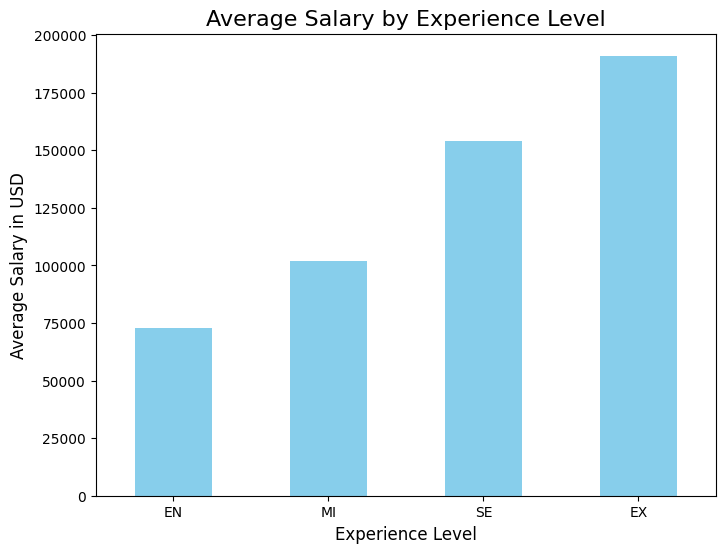

In [37]:
# Calculate the average salary for each experience level
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Ensure the experience levels are in the specified order
experience_order = ['EN', 'MI', 'SE', 'EX']
average_salary_by_experience = average_salary_by_experience.reindex(experience_order)

# Plot the bar chart
plt.figure(figsize=(8, 6))
average_salary_by_experience.plot(kind='bar', color='skyblue')

plt.title('Average Salary by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  # Labels on x-axis are horizontal
plt.show()

**5. By wich percentage does the salary increase between experience levels?**

In [29]:
# Extracting the average salaries in the order of experience levels
salary_EN = average_salary_by_experience['EN']
salary_MI = average_salary_by_experience['MI']
salary_SE = average_salary_by_experience['SE']
salary_EX = average_salary_by_experience['EX']

# Calculating percentage increases between levels
increase_EN_to_MI = ((salary_MI - salary_EN) / salary_EN) * 100
increase_MI_to_SE = ((salary_SE - salary_MI) / salary_MI) * 100
increase_SE_to_EX = ((salary_EX - salary_SE) / salary_SE) * 100


print(f"Increase from Entry-level to Mid-level: {increase_EN_to_MI:.1f}%")
print(f"Increase from Mid-level to Senior-level: {increase_MI_to_SE:.1f}%")
print(f"Increase from Senior-level to Executive: {increase_SE_to_EX:.1f}%")

Increase from Entry-level to Mid-level: 40.2%
Increase from Mid-level to Senior-level: 51.1%
Increase from Senior-level to Executive: 24.2%


**6. Wich  experience level is more sought after?**


In [43]:
# Count the occurrences of each experience level
experience_demand = df['experience_level'].value_counts()

# Identify the most sought-after experience level
most_sought_level = experience_demand.idxmax()
most_sought_count = experience_demand.max()

print(f'The most sought after experince level is {most_sought_level} as shown by the {most_sought_count} positions recorded in the dataset.')

The most sought after experince level is SE as shown by the 1554 positions recorded in the dataset.


### Observations:

The most sought-after experience level in the dataset is Senior (SE), with a total of 1,554 job positions recorded. This indicates a strong demand for professionals with senior-level experience, highlighting the value organizations place on expertise and leadership in the workforce. Additionally, executive roles require specific skills and extensive experience, leading companies to prioritize hiring senior professionals who can grow into these positions, resulting in a higher demand for senior and mid-level roles in the job market.

**7. What company size harbors the most employees?**

In [ ]:
# Count the number of employees for each company size
employee_count_by_size = df['company_size'].value_counts()

# Identify the company size with the most employees
most_employees_size = employee_count_by_size.idxmax()
most_employees_count = employee_count_by_size.max()

print(f'The company size with the most employees from this dataset is {most_employees_size} with a total of {most_employees_count} employees.')

The company size with the most employees from this dataset is M with a total of 2028 employees.


**8. Which countries have more large comapies?**

In [19]:
# Filter the DataFrame to include only large companies ('L' indicates large)
large_companies = df[df['company_size'] == 'L']

# Group by country and count the number of large companies in each
large_companies_by_country = large_companies.groupby('company_location').size()

# Sort the result in descending order to find the country with the most large companies
countries_with_most_large_companies = large_companies_by_country.sort_values(ascending=False).head(10)

print("Countries with the most large companies:")
print(countries_with_most_large_companies)

Countries with the most large companies:
company_location
US    263
IN     38
GB     20
CA     18
DE     17
FR     10
NL     10
AU      8
ES      6
PT      5
dtype: int64


**9. Which company size offers higher salaries?**

In [5]:
salary_by_size = df.groupby('company_size')['salary_in_usd'].mean()

highest_salary_size = salary_by_size.idxmax()
highest_salary_value = salary_by_size.max()

print(f'The company size with the highest salaries are {highest_salary_size} with an average of ${highest_salary_value:.1f} (USD).')

The company size with the highest salaries are M with an average of $143130.5 (USD).
